# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1012]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [1006]:
N = 17 # put your index here

In [1007]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print (u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [1020]:
#%%pycodestyle
# Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """
    NOISE = -1
    NOT_VISITED = -2

    def __init__(self, eps=0.8, min_samples=5, metric='euclidean', **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps = eps
        self.min_samples = min_samples
        self.distances = None
        self.metric = metric

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        self.labels = np.full(self.x_len, self.NOT_VISITED)  # fill with noise
        if self.metric == 'precomputed':
            self.distances = x
        else:
            self.distances = distance_matrix(x, x)
        C = -1
        for i in range(self.x_len):
            if self.labels[i] != self.NOT_VISITED:
                continue
            neighbors = self.region_query(i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = self.NOISE
            else:
                C += 1
                self.labels[i] = C
                self.expand_cluster(i, C)
        return self

    def expand_cluster(self, P, C):
        queue = [P]
        i = 0
        while i < len(queue):
            p = queue[i]
            neighbors = self.region_query(p)
            if len(neighbors) < self.min_samples:
                i += 1
                continue
            for p_n in neighbors:
                if self.labels[p_n] == self.NOISE:
                    self.labels[p_n] = C
                elif self.labels[p_n] == self.NOT_VISITED:
                    self.labels[p_n] = C
                    queue.append(p_n)
            i += 1

    def region_query(self, p):
        return np.where(self.distances[p] < self.eps)[0]

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

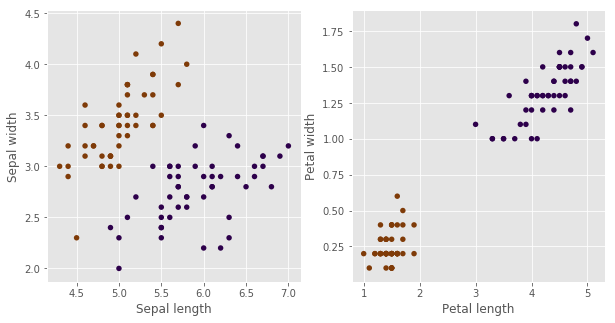

In [1021]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [1022]:
pred_iris = Clustering().fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [1026]:
dbscan = Clustering()
%timeit dbscan.fit_predict(x_iris)

3.73 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1027]:
dbscan_sklearn = DBSCAN()

In [1028]:
%timeit dbscan_sklearn.fit_predict(x_iris)

1.21 ms ± 245 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Silhouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [1029]:
## Задание 2
from sklearn.metrics import silhouette_score
def quality(x, y, metric='euclidean'):
    """
    Implement quality criterion of your choice. Let's implement Silhouette
    Paper: Peter J. Rousseeuw (1987) Silhouettes: a Graphical Aid
    to the Interpretation and Validation of Cluster Analysis
    """
    return silhouette_score(x, y, metric=metric)
    distances = distance_matrix(x, x)
    clusters = np.unique(y)
    silhouettes = np.full(len(x), np.inf)
    for i in range(len(x)):
        point_clust = y[i]
        point_dists = distances[i]
        if point_dists[y == point_clust].size == 1: 
            # according to paper 
            silhouettes[i] = 0
            continue
        point_clust_within_distances = point_dists[y == point_clust].mean()
        point_clust_other_distances = []
        for j in range(len(clusters)):
            other_cluster = clusters[j]
            if other_cluster == point_clust: continue
            point_clust_other_distances.append(point_dists[y == other_cluster].mean())
        point_clust_other_distances_min = min(point_clust_other_distances)
        max_a_b = max(point_clust_within_distances, point_clust_other_distances_min)
        silhouettes[i] = (point_clust_other_distances_min - point_clust_within_distances) / max_a_b
    return silhouettes.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

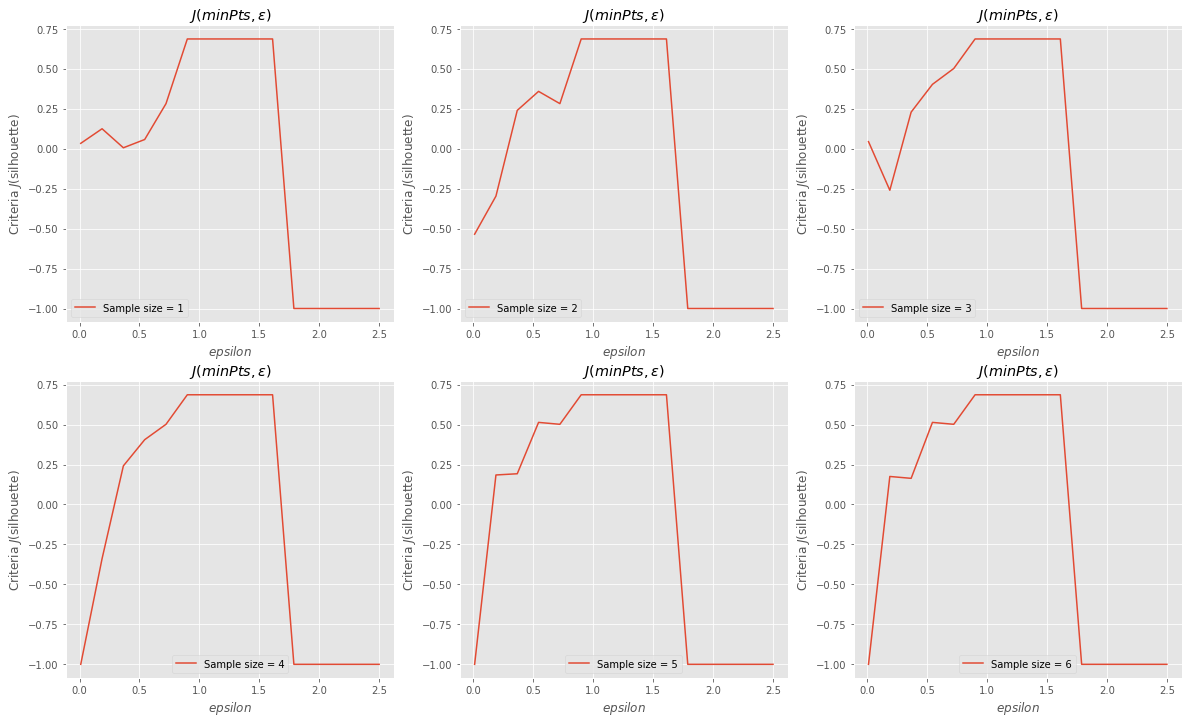

In [1030]:
# Для чистоты эксперимента будем использовать весь датасет
iris = ds.load_iris()
x = iris.data

sample_sizes = range(1, 7)
eps = np.linspace(0.01, 2.5, 15)
criteria = np.zeros((len(sample_sizes), len(eps)))
for i, sample_size in enumerate(sample_sizes):
    for j, e in enumerate(eps):
        cls = Clustering(eps=e, min_samples=sample_size)
        y = cls.fit_predict(x)
        if np.unique(y).size == 1: 
            # Случай, когда DBSCAN создает лишь один кластер
            # такое может произойти, судя по графикам, при epsilon > 1.8
            criteria[i][j] = -1
            continue
        criteria[i][j] = quality(x, y)

# Plot minPts / epsilon
size_num = 0
_, ax = plt.subplots(2, 3, figsize=(20, 12))
for i in range(len(ax)):
        h_ax = ax[i]
        for j in range(len(h_ax)):
            ax[i][j].set_title("$J(minPts, \epsilon)$")
            ax[i][j].plot(eps, criteria[size_num], label="Sample size = {0}".format(size_num + 1))
            ax[i][j].set_xlabel("$epsilon$")
            ax[i][j].set_ylabel("Criteria $J$(silhouette)")
            ax[i][j].legend()
            size_num += 1

In [1031]:
best_indx = np.where(criteria == criteria.max())
best_sample_size = sample_sizes[best_indx[0][0]]
best_eps = eps[best_indx[1][0]]
print("Best score for silhouette criteria: {0}".format(criteria.max()))
print("With params: epsilon = {0}, min_samples = {1}".format(best_eps, best_sample_size))

Best score for silhouette criteria: 0.6863930543204848
With params: epsilon = 0.8992857142857145, min_samples = 1


In [1032]:
## Задание 3

In [1033]:
# Загрузка данных
df = pd.read_csv('WDI_csv/WDIDATA.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [1034]:
# Зафиксируем 2015 год и переведем индикаторы в признаки
date = '2015'
df_2015 = df[["Country Name", "Indicator Name", date]]
df_2015 = df_2015.set_index(["Country Name", "Indicator Name"]).unstack(level=1)[date]
df_2015.head()

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,61.5,30.10,71.500000,64.200000,92.500000,NaN,NaN,NaN,...,32.6,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,28.559831
Albania,NaN,NaN,NaN,75.37,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.815050
Algeria,NaN,NaN,NaN,92.70,99.336708,98.687683,99.605331,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.012976
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,100.00,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1035]:
# В признаках довольно большое количество null
print("Mean of null values in columns: ", df_2015.isnull().sum().mean())

Mean of null values in columns:  128.76807039597736


In [1036]:
# Поэтому выберем наиболее информативные признаки - имеющие 90% заполненных значений у всех стран
col_to_drop = []
df_null_sum = df_2015.isnull().sum()
for idx, null_sum in enumerate(df_null_sum):
    if null_sum >= 0.2 * len(df_2015):
        col_to_drop.append(df_null_sum.index[idx])
df_2015_droped_cols = df_2015.drop(columns=col_to_drop)

In [1037]:
# В некоторых странах до сих пор остаются много пропусков - уберем их c пропусками более 50
counties_to_drop = df_2015_droped_cols.isnull().sum(axis=1)
counties_to_drop.sort_values(ascending=False).head(10)

Country Name
Not classified              396
St. Martin (French part)    374
Turks and Caicos Islands    353
Isle of Man                 353
British Virgin Islands      351
Gibraltar                   343
Cayman Islands              341
Northern Mariana Islands    336
Liechtenstein               333
Monaco                      321
dtype: int64

In [1038]:
# И заполним пропуски средним по признаку (хотя по-хорошему это должен делать эксперт), а также стандартизируем данные
df_2015_droped = df_2015_droped_cols.loc[counties_to_drop < 100]
df_2015_droped = df_2015_droped.fillna(df_2015_droped.mean())
df_2015_complete = (df_2015_droped - df_2015_droped.mean()) / df_2015_droped.std()

In [1039]:
metric = 'correlation'
df_2015_complete.shape

(223, 396)

In [1040]:
def cluster_grid_search(clf, data, metric):
    sample_sizes = range(1, 5)
    eps = np.linspace(0.01, 1, 150)
    best_score = -2
    dists = cdist(data, data, metric=metric)
    for i, sample_size in enumerate(sample_sizes):
        for j, e in enumerate(eps):
            cls = clf(eps=e, min_samples=sample_size, metric='precomputed')
            y = cls.fit_predict(dists)
            uniq = np.unique(y)
            if y[y==-1].size > 0:
                continue
            if not 1 < uniq.size < y.size - 1:
                continue
            quality_ = quality(data, y, metric=metric)
            if quality_ > best_score:
                print("Current best score: ", quality_)
                best_clf = cls
                best_score = quality_
                best_eps = e
                best_sample_size = sample_size
    return (best_clf, best_score, best_eps, best_sample_size)

In [1041]:
best_clf, best_score, best_eps, best_sample_size = cluster_grid_search(Clustering, df_2015_complete, metric)

Current best score:  0.0601331234878
Current best score:  0.0814960606059
Current best score:  0.0887834368754
Current best score:  0.107528710528
Current best score:  0.118795259329
Current best score:  0.123847384862
Current best score:  0.127571187733
Current best score:  0.132541222589
Current best score:  0.144907853464
Current best score:  0.148238606357
Current best score:  0.150152207098


In [1042]:
print("Best params: eps = {0}, samples = {1}, quality = {2}".format(best_eps, best_sample_size, best_score))

Best params: eps = 0.16946308724832215, samples = 1, quality = 0.15015220709782284


In [1043]:
dists = cdist(df_2015_complete, df_2015_complete, metric)
y = best_clf.fit_predict(dists)

In [1044]:
# Визуализация
tsne = sm.TSNE(n_components=2,metric='correlation', verbose=1, random_state=42).fit_transform(df_2015_complete)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 223 samples in 0.000s...
[t-SNE] Computed neighbors for 223 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 223 / 223
[t-SNE] Mean sigma: 0.309256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.747910
[t-SNE] Error after 1000 iterations: 0.441411


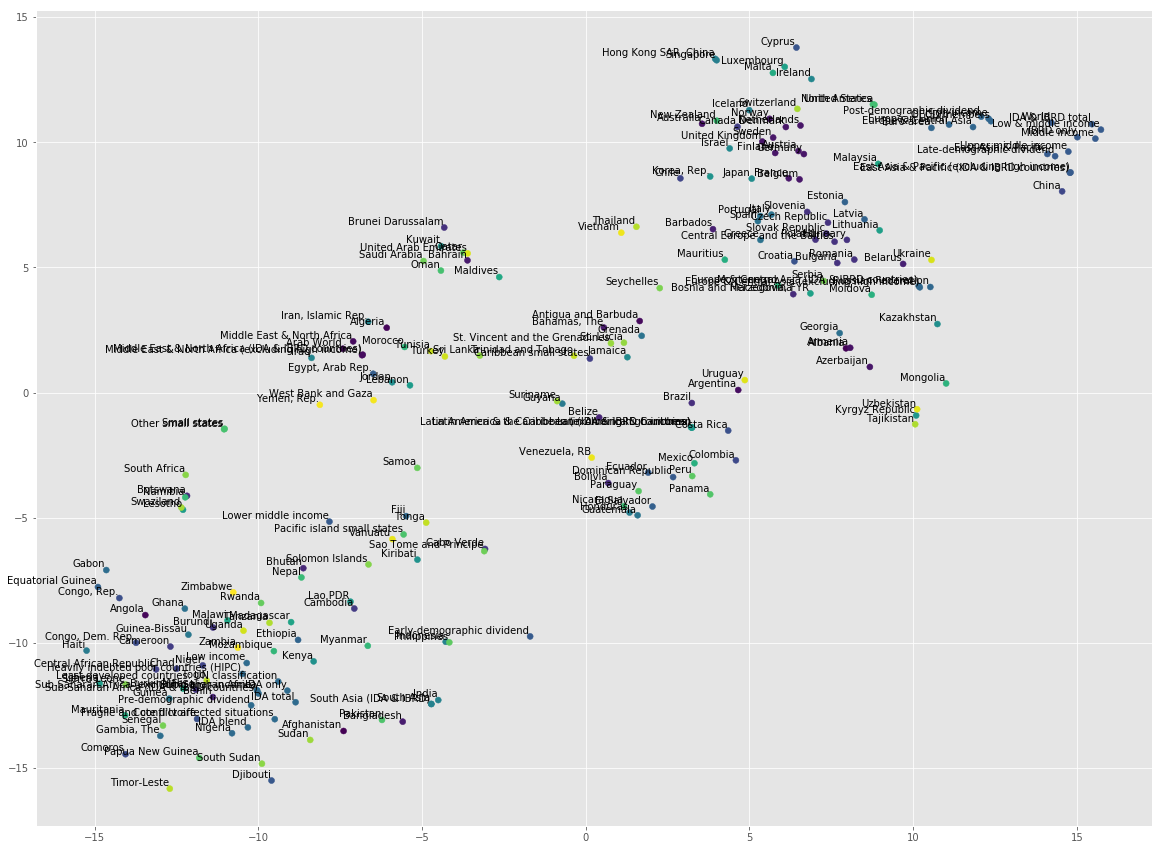

In [1045]:
plt.figure(figsize = (20,15))
plt.scatter(tsne[:, 0], tsne[:, 1], c=y)
for label, i, j in zip(df_2015_complete.index, tsne[:, 0], tsne[:, 1]):
    plt.annotate(
        label,
        xy=(i, j), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
    )

plt.show()

In [ ]:
## Задание 4

По результатам экспериментов, dbscan, в силу своей специфики, может выделять либо один большой кластер (при больших eps), либо большое количество шума.
В итоге были выбраны параметры, которые выделяют хорошо интерпретируемые кластеры с наибольшим параметром качества(силуэт), но при этом получилось большое количество маленьких кластеров.

Рассмотрим кластеры с более чем 3 странами.

In [1046]:
for i in np.unique(y):
    if df_2015_complete.iloc[y == i].index.size > 2:
        print("Cluster index with more than 3 countries: ", i)

Cluster index with more than 3 countries:  5
Cluster index with more than 3 countries:  9
Cluster index with more than 3 countries:  24
Cluster index with more than 3 countries:  46
Cluster index with more than 3 countries:  53
Cluster index with more than 3 countries:  54
Cluster index with more than 3 countries:  56
Cluster index with more than 3 countries:  61
Cluster index with more than 3 countries:  71
Cluster index with more than 3 countries:  87


In [1047]:
list(df_2015_complete.iloc[y == 5].index)

['Arab World',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle East & North Africa (excluding high income)']

Кластер со средними показателями арабских и африканских стран

In [1048]:
list(df_2015_complete.iloc[y == 9].index)

['Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Netherlands',
 'Norway',
 'Sweden',
 'United Kingdom']

Кластер содержащий передовыми странами запада

In [1049]:
list(df_2015_complete.iloc[y == 24].index)

['Bulgaria',
 'Central Europe and the Baltics',
 'Czech Republic',
 'Hungary',
 'Poland',
 'Romania',
 'Slovak Republic',
 'Slovenia']

Страны центральной Европы и Прибалтики

In [1050]:
list(df_2015_complete.iloc[y == 46].index)

['Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'IBRD only',
 'IDA & IBRD total',
 'Late-demographic dividend',
 'Low & middle income',
 'Lower middle income',
 'Middle income',
 'Upper middle income',
 'World']

Усредненные показатели по странам Восточной Азии

In [1051]:
list(df_2015_complete.iloc[y == 53].index)

['Euro area',
 'Europe & Central Asia',
 'European Union',
 'High income',
 'OECD members',
 'Post-demographic dividend']

Усредненные показатели Европы

In [1052]:
list(df_2015_complete.iloc[y == 56].index)

['Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Least developed countries: UN classification',
 'Low income',
 'Nigeria',
 'Pre-demographic dividend',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)']

Показатели нищих стран + страны Африки + страны с нестабильной ситуацией

In [1053]:
list(df_2015_complete.iloc[y == 61].index)

['Greece', 'Italy', 'Portugal', 'Spain']

Европейские страны, которые расположены на побережье Атлантического океана

In [1054]:
list(df_2015_complete.iloc[y == 71].index)

['India', 'South Asia', 'South Asia (IDA & IBRD)']

Показатели по Южной Азии и Индии

In [1055]:
list(df_2015_complete.iloc[y == 87].index)

['Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)']

Усредненные показатели стран латинской Америки

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.